In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

In [3]:

dta= pd.read_csv('/content/drive/MyDrive/Document from Jack')
dta.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
dta.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder


In [7]:
label_encoder = LabelEncoder()
dta['label'] = label_encoder.fit_transform(dta['label'])

In [8]:
dta.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,13
1,85,58,41,21.770462,80.319644,7.038096,226.655537,13
2,60,55,44,23.004459,82.320763,7.840207,263.964248,13
3,74,35,40,26.491096,80.158363,6.980401,242.864034,13
4,78,42,42,20.130175,81.604873,7.628473,262.717340,13


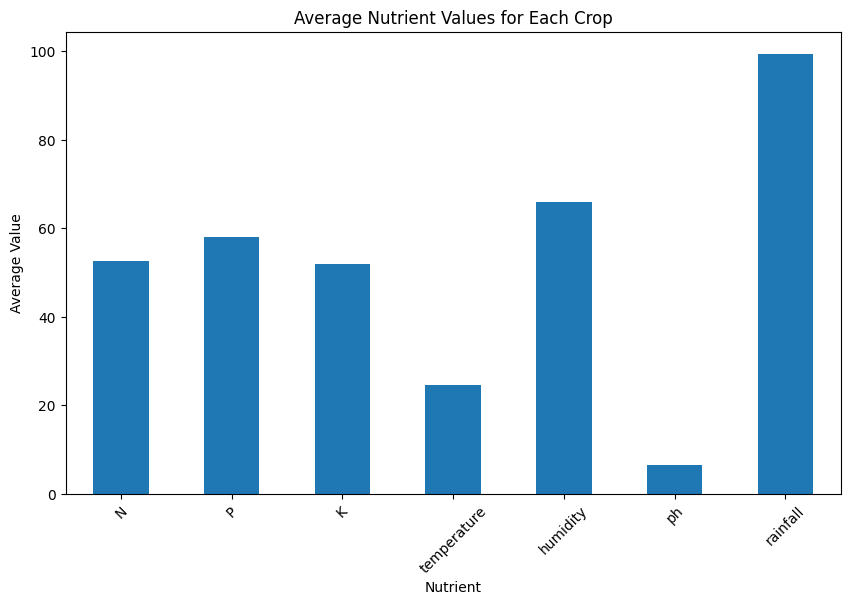

In [10]:
avg_nutrient_values = dta.drop('label', axis=1).mean()
plt.figure(figsize=(10, 6))
avg_nutrient_values.plot(kind='bar')
plt.title('Average Nutrient Values for Each Crop')
plt.xlabel('Nutrient')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()


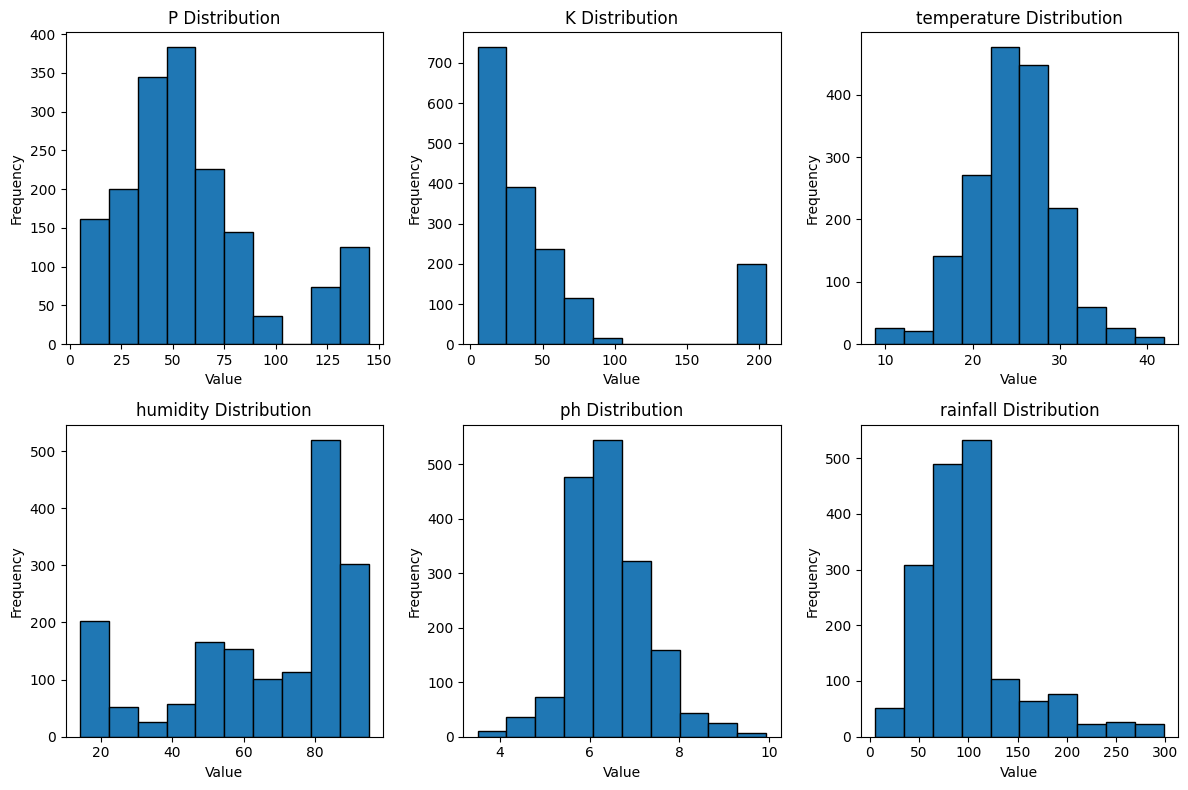

In [11]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(dta.columns[1:]):
    if i < 6:
        plt.subplot(2, 3, i+1)
        plt.hist(dta[column], bins=10, edgecolor='black')
        plt.title(f'{column} Distribution')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


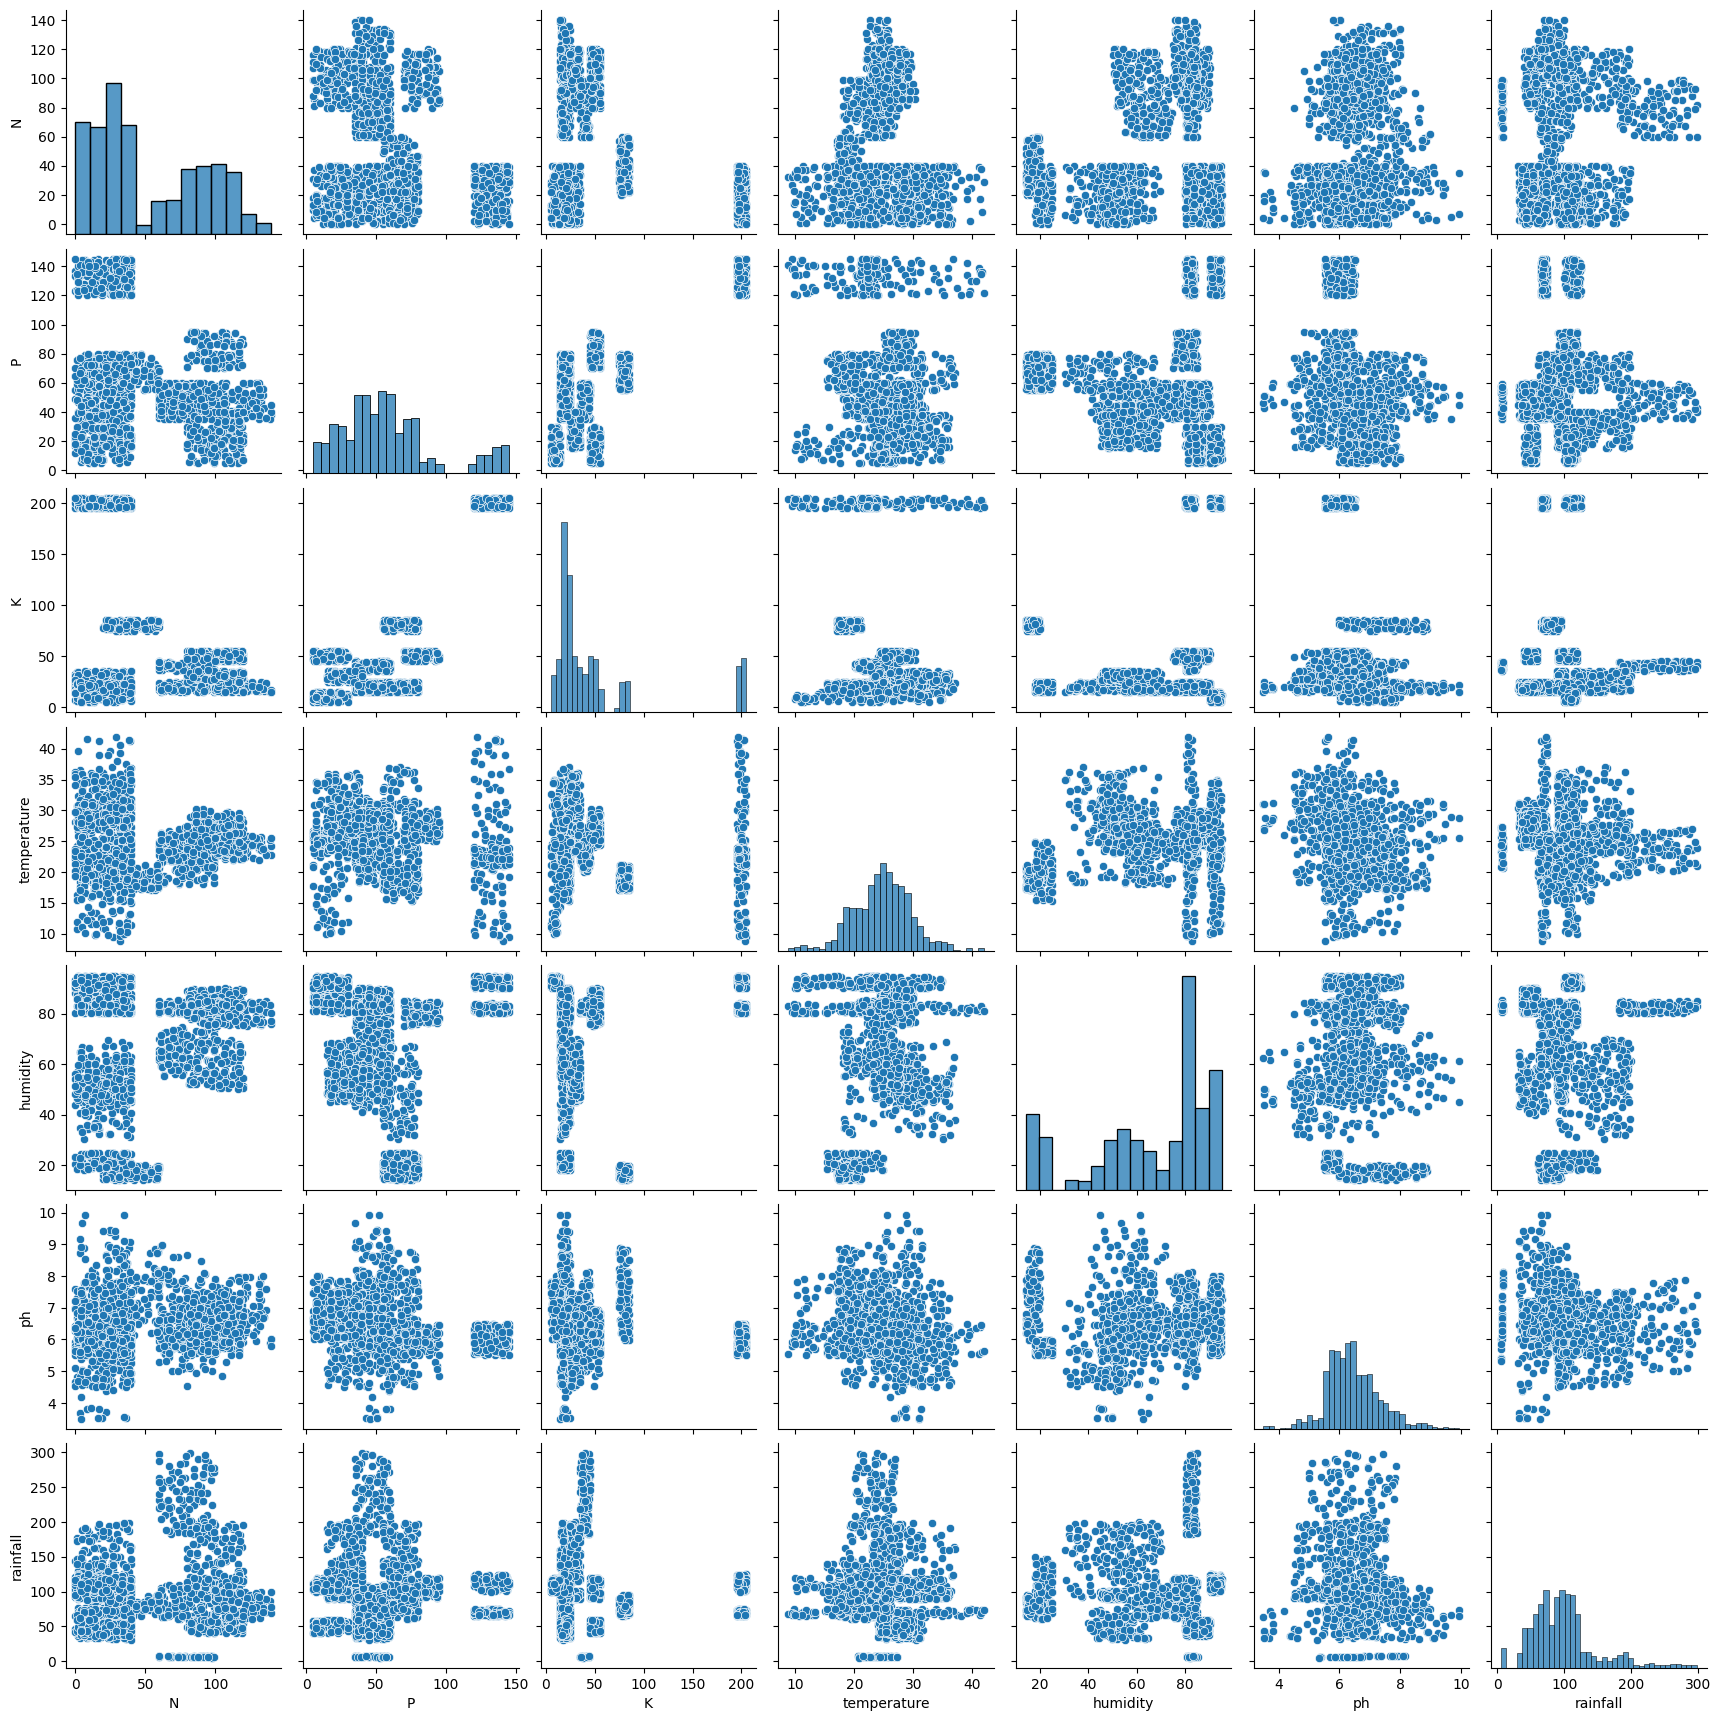

In [12]:
sns.pairplot(dta.drop('label', axis=1))
plt.show()

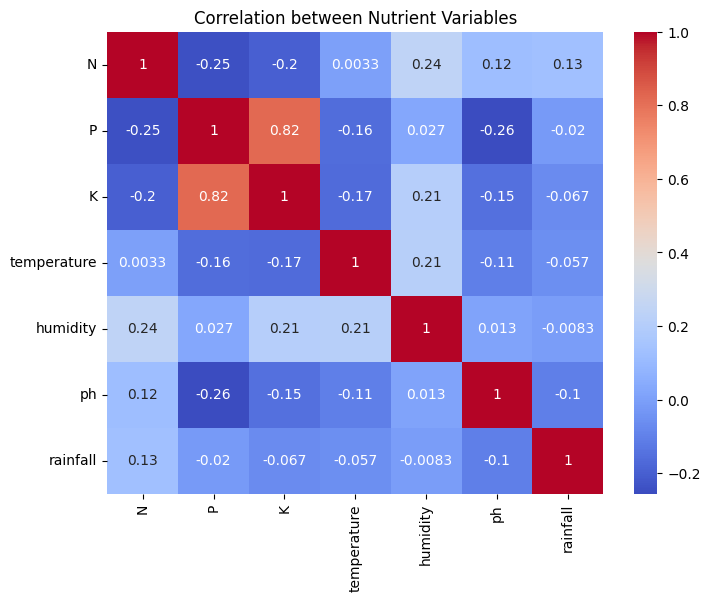

In [14]:
corr_matrix = dta.drop('label', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Nutrient Variables')
plt.show()

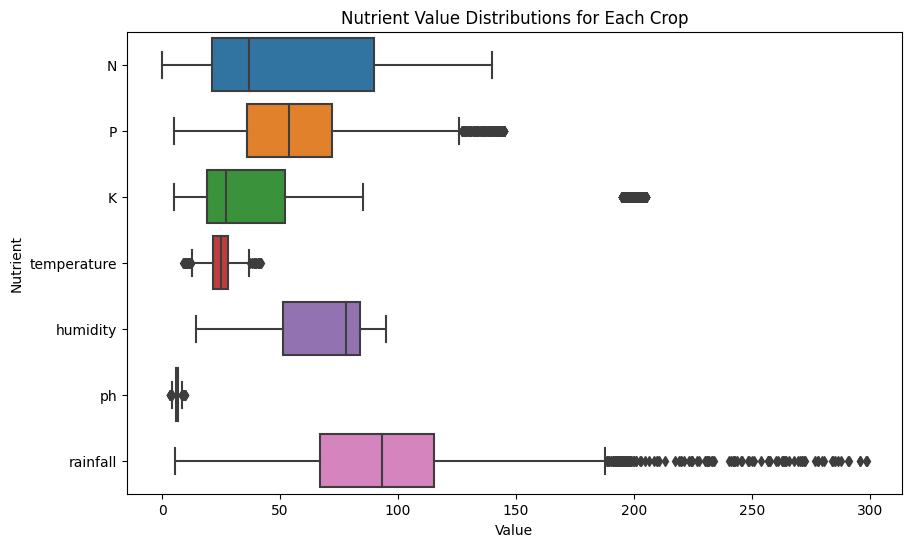

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dta.drop('label', axis=1), orient='h')
plt.title('Nutrient Value Distributions for Each Crop')
plt.xlabel('Value')
plt.ylabel('Nutrient')
plt.show()

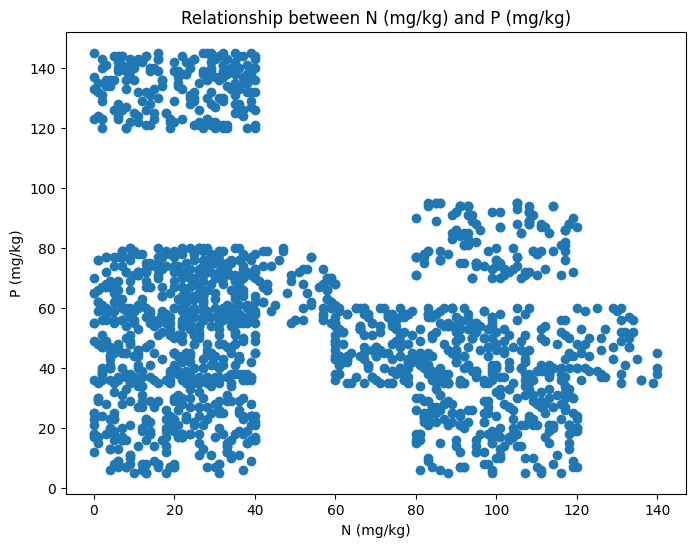

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(dta['N'], dta['P'])
plt.title('Relationship between N (mg/kg) and P (mg/kg)')
plt.xlabel('N (mg/kg)')
plt.ylabel('P (mg/kg)')
plt.show()

In [20]:
X = dta.drop('label', axis=1)
y = dta['label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
rf = RandomForestClassifier(random_state=42)

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = rf.predict(X_test)


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

In [27]:
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 100.00%
